## Import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Store data, labels in the list

In [2]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

## Assigning Parth for Dataset

In [11]:
os.chdir('/Users/anantgovil/Developer/Datasets/GTSRB')

train_path='/Users/anantgovil/Developer/Datasets/GTSRB/Train'
data_path='/Users/anantgovil/Developer/Datasets/GTSRB'

cur_path

'/Users/anantgovil/Developer/traffic-sign-detection'

## Finding Total Classes

In [4]:
Classes=len(os.listdir(train_path))
Classes

43

## Vidualizing the Dataset

In [5]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

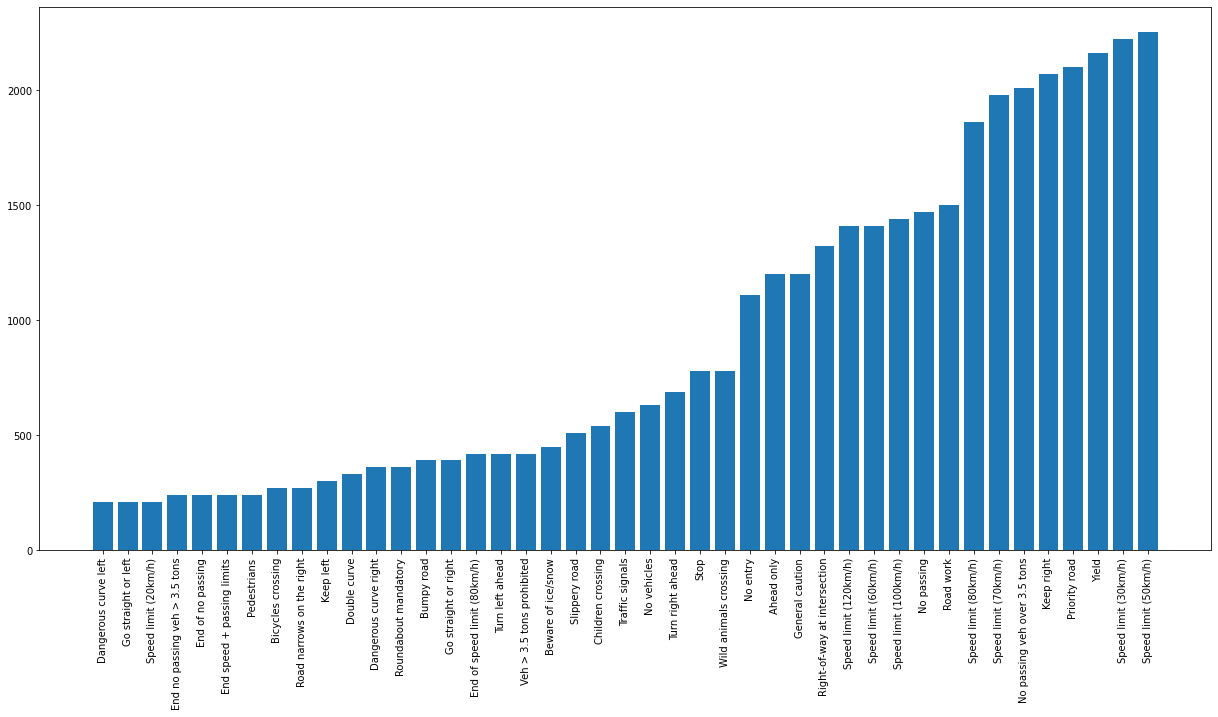

In [6]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

### Visualizing 25 Random Images from Test Data

/var/folders/xj/54jm2w3d6t55zkcnj3q52fqc0000gn/T/ipykernel_29686/512143836.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


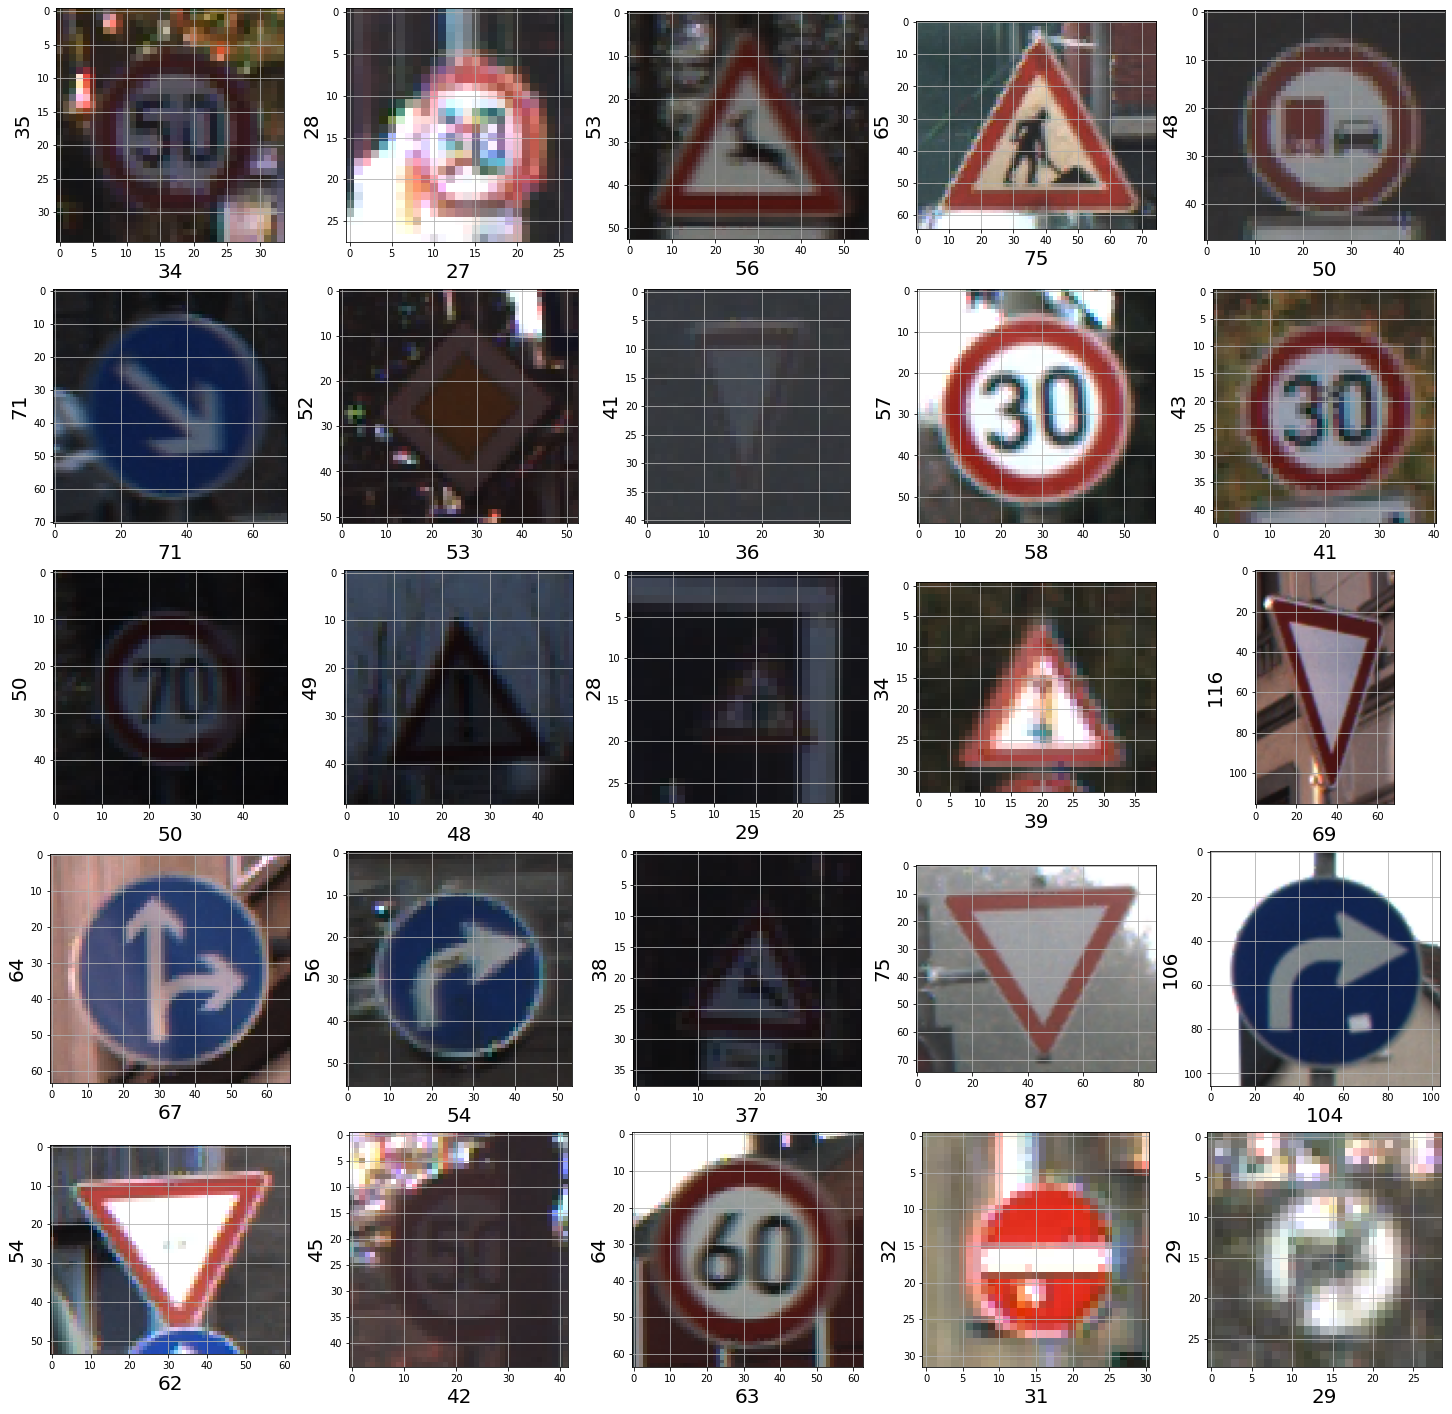

In [7]:
import random
from matplotlib.image import imread
data_dir='/Users/anantgovil/Developer/Datasets/GTSRB'
test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

## Preprocess the images

In [8]:
cur_path

'/Users/anantgovil/Developer/traffic-sign-detection'

In [12]:
for i in classes:
    path = os.path.join(data_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '//'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

## Converting lists into numpy arrays

In [13]:
data = np.array(data)
labels = np.array(labels)

## Save Labels & Data for future use

In [14]:
#os.mkdir('training')
os.chdir('/Users/anantgovil/Developer/Datasets/GTSRB')

np.save('training/data',data)
np.save('training/target',labels)

## Load data & Labels

In [15]:
data=np.load('training/data.npy')
labels=np.load('training/target.npy')

In [16]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Convert labels to onehot encoding

In [19]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Now it's time to build the model

In [20]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [21]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20


2022-11-21 14:18:20.582469: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


981/981 [==============================] - 28s 28ms/step - loss: 2.2283 - accuracy: 0.4320 - val_loss: 0.7911 - val_accuracy: 0.7951
Epoch 2/20
981/981 [==============================] - 27s 28ms/step - loss: 0.8622 - accuracy: 0.7440 - val_loss: 0.2900 - val_accuracy: 0.9222
Epoch 3/20
981/981 [==============================] - 26s 27ms/step - loss: 0.4776 - accuracy: 0.8592 - val_loss: 0.1381 - val_accuracy: 0.9649
Epoch 4/20
981/981 [==============================] - 30s 31ms/step - loss: 0.3778 - accuracy: 0.8886 - val_loss: 0.1370 - val_accuracy: 0.9623
Epoch 5/20
981/981 [==============================] - 29s 30ms/step - loss: 0.3187 - accuracy: 0.9066 - val_loss: 0.1094 - val_accuracy: 0.9702
Epoch 6/20
981/981 [==============================] - 29s 30ms/step - loss: 0.2794 - accuracy: 0.9201 - val_loss: 0.1385 - val_accuracy: 0.9602
Epoch 7/20
981/981 [==============================] - 26s 27ms/step - loss: 0.2548 - accuracy: 0.9291 - val_loss: 0.0705 - val_accuracy: 0.9797
Epo

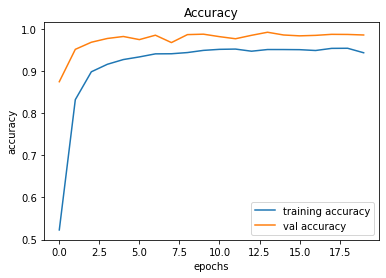

In [ ]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

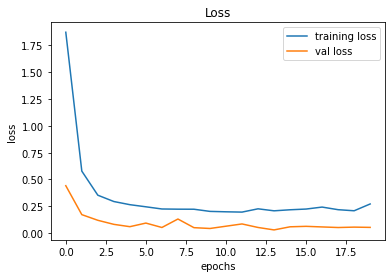

In [ ]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## LEt's do testing on Test data

In [ ]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    y_new = y_test
    print(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [ ]:
X_test, label = testing('Test.csv')

Test.csv


In [ ]:
'''
Y_pred = model.predict_classes(X_test)
Y_pred
'''

Y_pred = model.predict(X_test)
Y_pred = np.round(Y_pred).astype(int)

395/395 [==============================] - 3s 8ms/step


## Accuracy with the test data

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_new,Y_pred))

ValueError: Expected array-like (array or non-string sequence), got None

## Save the model

In [ ]:
model.save("training/TSR.h5")

## Load the Model

In [ ]:
import os
os.chdir(r'/Users/anantgovil/Developer/Datasets/GTSRB')
from keras.models import load_model
model = load_model('training/TSR.h5')

In [ ]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    Y_pred = np.round(Y_pred).astype(int)
    return image,Y_pred

1/1 [==============================] - 0s 51ms/step
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1
Predicted traffic sign is:  Speed limit (30km/h)


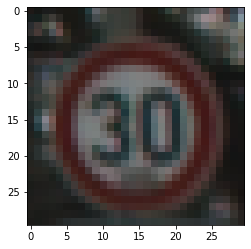

In [ ]:
plot,prediction = test_on_img(r'/Users/anantgovil/Developer/Datasets/GTSRB/Test/00508.png')
s = [str(i).replace("0\n","0") for i in prediction]
print(s[0])
x = s[0][1:-1]
y = x.split()

i = y.index('1')
print(i)

print("Predicted traffic sign is: ", classes[i])
plt.imshow(plot)
plt.show()